In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# Read in the BathSoap.csv file
bathSoap_df = pd.read_csv('BathSoap.csv', index_col="Member id")
bathSoap_df.fillna(0, inplace=True)



In [44]:
# Creating required column lists


demographicIndicators = bathSoap_df.columns[1:11]
purchaseIndicator = bathSoap_df.columns[11:19]
withinPromotionIndicator = bathSoap_df.columns[19:22]
brandIndicator = bathSoap_df.columns[22:30]
otherBrandIndicator = bathSoap_df.columns[30:31]
priceCategoryIndicator = bathSoap_df.columns[31:35]
sellingPropertyIndicator = bathSoap_df.columns[35:46]



In [47]:
bathSoap_df.head()

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,"Br. Cd. 57, 144",Br. Cd. 55,Br. Cd. 272,Br. Cd. 286,Br. Cd. 24,Br. Cd. 481,Br. Cd. 352,Br. Cd. 5,Others 999,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,Class
Member id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,3.0,17.0,8025.0,24.0,818.0,1.41,334.38,10.19,1.000000,0.000000,0.000000,0.376947,0.130841,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.492212,0.233645,0.560748,0.130841,0.074766,0.501558,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564,Success
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,5.0,25.0,13975.0,40.0,1681.5,1.60,349.38,12.03,0.887299,0.096601,0.016100,0.021467,0.075134,0.0,0.000000,0.0,0.059034,0.0,0.144902,0.699463,0.293381,0.547406,0.094812,0.064401,0.456172,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000,Success
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,5.0,37.0,23100.0,63.0,1950.0,1.70,366.67,8.44,0.941558,0.019481,0.038961,0.025974,0.545455,0.0,0.030303,0.0,0.000000,0.0,0.019481,0.378788,0.120130,0.318182,0.561688,0.000000,0.244589,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247,Success
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,2.0,4.0,1500.0,4.0,114.0,1.00,375.00,7.60,1.000000,0.000000,0.000000,0.400000,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.400000,0.600000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000,Fail
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,3.0,6.0,8300.0,13.0,591.0,2.17,638.46,7.12,0.614458,0.144578,0.240964,0.048193,0.144578,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.807229,0.000000,0.048193,0.144578,0.807229,0.807229,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000,Fail


In [16]:
brandIndicator

Index(['Br. Cd. 55', 'Br. Cd. 272', 'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481',
       'Br. Cd. 352', 'Br. Cd. 5', 'Others 999'],
      dtype='object')

In [3]:
# Creating a new column for Brand loyalty
bathSoap_df['maxBrandIndicator'] = bathSoap_df[brandIndicator].max(axis=1)

In [4]:
#X2 = df[['Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4',
 #        'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8',
  #       'PropCat 9', 'PropCat 10', 'PropCat 11', 'PropCat 12',
   #      'PropCat 13', 'PropCat 14', 'PropCat 15']]
#   KeyError: "None of [Index(['Brand RunsmaxBrandIndicatorPr Cat 1',\n       'Total VolumemaxBrandIndicatorPr Cat 1',\n       'No. of  TransmaxBrandIndicatorPr Cat 1',\n       'ValuemaxBrandIndicatorPr Cat 1',\n       'Trans / Brand RunsmaxBrandIndicatorPr Cat 1',\n       'Vol/TranmaxBrandIndicatorPr Cat 1',\n       'Avg. Price maxBrandIndicatorPr Cat 1',\n       'Pur Vol No Promo - %maxBrandIndicatorPr Cat 1'],\n      dtype='object')] are in the [columns]"


In [5]:
bathSoap_df.columns

Index(['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS',
       'Affluence Index', 'No. of Brands', 'Brand Runs', 'Total Volume',
       'No. of  Trans', 'Value', 'Trans / Brand Runs', 'Vol/Tran',
       'Avg. Price ', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %',
       'Pur Vol Other Promo %', 'Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272',
       'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5',
       'Others 999', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4',
       'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9',
       'PropCat 10', 'PropCat 11', 'PropCat 12', 'PropCat 13', 'PropCat 14',
       'PropCat 15', 'Class', 'maxBrandIndicator'],
      dtype='object')

In [6]:
list(purchaseIndicator)


['Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %']

In [7]:

otherBrandIndicator

Index(['Pr Cat 1'], dtype='object')

In [8]:
# Selecting variables for clustering based on purchase behavior
X1 = bathSoap_df[list(purchaseIndicator)+['maxBrandIndicator']+list(otherBrandIndicator)]
#X1 = df[['Vol/Tran', 'Avg. Price ', 'Pur Vol Promo 6 %']]
#X1_cols = X1.columns


In [9]:
# Selecting variables for clustering based on basis for purchase
X2 = bathSoap_df[list(priceCategoryIndicator)+['Pur Vol No Promo - %', 
                                               'Pur Vol Promo 6 %', 'Pur Vol Other Promo %', 
                                               'PropCat 5', 'PropCat 14']]

# Define variables for basis for purchase
#X2 = df[['Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4',
 #        'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8',
  #       'PropCat 9', 'PropCat 10', 'PropCat 11', 'PropCat 12',
   #      'PropCat 13', 'PropCat 14', 'PropCat 15']]
#X2_cols = X2.columns


In [10]:
# Selecting variables for clustering based on both purchase behavior and basis for purchase

X3 = bathSoap_df[list(purchaseIndicator)+list(otherBrandIndicator)+list(priceCategoryIndicator)+['maxBrandIndicator','Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %', 'PropCat 5', 'PropCat 14']]

# Define variables for both purchase behavior and basis of purchase
#X3 = df.drop(['Member id', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS',
   #           'Affluence Index', 'No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans',
  #            'Value', 'Trans / Brand Runs', 'Vol/Tran', 'Avg. Price ', 'Pur Vol No Promo - %',
 #             'Pur Vol Other Promo %', 'Br. Cd. 57, 144'], axis=1)
 
#X3_cols = X3.columns

In [11]:
# Scaling the data
scaler = StandardScaler()
X1_std = scaler.fit_transform(X1)
X2_std = scaler.fit_transform(X2)
X3_std = scaler.fit_transform(X3)

In [12]:
#Running KMeans clustering for 2 and 3 clusters for purchase behavior variables
kmeans1_2 = KMeans(n_clusters=2, random_state=0).fit(X1_std)
kmeans1_3 = KMeans(n_clusters=3, random_state=0).fit(X1_std)

#Running KMeans clustering for 2 and 3 clusters for basis for purchase variables
kmeans2_2 = KMeans(n_clusters=2, random_state=0).fit(X2_std)
kmeans2_3 = KMeans(n_clusters=3, random_state=0).fit(X2_std)

#Running KMeans clustering for 2 and 3 clusters for both purchase behavior and basis for purchase variables
kmeans3_2 = KMeans(n_clusters=2, random_state=0).fit(X3_std)
kmeans3_3 = KMeans(n_clusters=3, random_state=0).fit(X3_std)

#Evaluating the Silhouette Scores for each clustering
print("Silhouette Scores for KMeans Clustering:")
print("2 Clusters based on purchase behavior: ", silhouette_score(X1_std, kmeans1_2.labels_))
print("3 Clusters based on purchase behavior: ", silhouette_score(X1_std, kmeans1_3.labels_))
print("2 Clusters based on basis for purchase: ", silhouette_score(X2_std, kmeans2_2.labels_))
print("3 Clusters based on basis for purchase: ", silhouette_score(X2_std, kmeans2_3.labels_))
print("2 Clusters based on both purchase behavior and basis for purchase: ", silhouette_score(X3_std, kmeans3_2.labels_))
print("3 Clusters based on both purchase behavior and basis for purchase: ", silhouette_score(X3_std, kmeans3_3.labels_))

Silhouette Scores for KMeans Clustering:
2 Clusters based on purchase behavior:  0.16829155316962394
3 Clusters based on purchase behavior:  0.1827223451548037
2 Clusters based on basis for purchase:  0.3850319619277165
3 Clusters based on basis for purchase:  0.27122591496529497
2 Clusters based on both purchase behavior and basis for purchase:  0.2700156816354
3 Clusters based on both purchase behavior and basis for purchase:  0.1724401741092321


In [13]:
purchaseIndicator

Index(['Brand Runs', 'Total Volume', 'No. of  Trans', 'Value',
       'Trans / Brand Runs', 'Vol/Tran', 'Avg. Price ',
       'Pur Vol No Promo - %'],
      dtype='object')

In [14]:

# Define variables for purchase behavior
X1 = df[['Vol/Tran', 'Avg. Price ', 'Pur Vol Promo 6 %']]
X1_cols = X1.columns

# Define variables for basis for purchase
X2 = df[['Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4',
         'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8',
         'PropCat 9', 'PropCat 10', 'PropCat 11', 'PropCat 12',
         'PropCat 13', 'PropCat 14', 'PropCat 15']]
X2_cols = X2.columns

# Define variables for both purchase behavior and basis of purchase
X3 = df.drop(['Member id', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS',
              'Affluence Index', 'No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans',
              'Value', 'Trans / Brand Runs', 'Vol/Tran', 'Avg. Price ', 'Pur Vol No Promo - %',
              'Pur Vol Other Promo %', 'Br. Cd. 57, 144'], axis=1)
X3_cols = X3.columns

#KeyError: "['No. of Trans', 'Br. Cd. 57'] not found in axis"
# Standardize the data
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

#scaler3 = StandardScaler()
#X3_scaled = scaler3.fit_transform(X3)

# Perform k-means clustering for 2 clusters on purchase behavior
kmeans1_2 = KMeans(n_clusters=2, random_state=0).fit(X1_scaled)
X1['cluster'] = kmeans1_2.labels_

# Perform k-means clustering for 3 clusters on purchase behavior
#kmeans1_3 = KMeans(n_clusters=3, random_state=0).fit(X1_scaled)
#X1['cluster'] = kmeans1_3.labels_

# Perform k-means clustering for 2 clusters on basis for purchase
kmeans2_2 = KMeans(n_clusters=2, random_state=0).fit(X2_scaled)
X2['cluster'] = kmeans2_2.labels_

# Perform k-means clustering for 3 clusters on basis for purchase
kmeans2_3 = KMeans(n_clusters=3, random_state=0).fit(X2_scaled)
X2['cluster'] = kmeans2_3.labels_

# Perform k-means clustering for 2 clusters on both purchase behavior and basis of purchase
#kmeans3_2 = KMeans(n_clusters=2, random_state=0).fit(X3_scaled)
#X3['cluster'] = kmeans3_2.labels_

# Perform k-means clustering for 3 clusters on both purchase behavior and basis of purchase
#kmeans3_3 = KMeans(n_clusters=3, random_state=0).fit(X3_scaled)
#X3['cluster'] = kmeans3_3.labels_

# Print the


NameError: name 'df' is not defined

In [ ]:
X2

In [20]:


from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
# %matplotlib inline 
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler


bath_df = pd.read_csv("BathSoap.csv")
bath_df.head()

# Identifying variable groups according to assignment note 
demographicIndicators = bath_df.columns[1:11] 
purchaseIndicator = bath_df.columns[11:19] 
withinPromotionIndicator = bath_df.columns[19:22]
brandIndicator = bath_df.columns[22:30] 
otherBrandIndicator = bath_df.columns[30:31] 
priceCategoryIndicator = bath_df.columns[31:35] 
sellingPropertyIndicator = bath_df.columns[35:46]

# Creating brand loyalty colomn 
bath_df['maxBrandIndicator'] = bath_df[brandIndicator].max(axis=1)
bath_df.dtypes
bath_df[brandIndicator].columns


Index(['Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272', 'Br. Cd. 286',
       'Br. Cd. 24', 'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5'],
      dtype='object')

In [27]:

##### Question 1 
# Part a 

# Variables that describe Purchase Behaviour include 
# purchaseIndicator variables, maxBrandIndicator, & otherBrandIndicator variables 
# These variables are to be grouped in one dataset 

bath11 = bath_df[brandIndicator]

bath12 = bath_df[list(priceCategoryIndicator)+['Pur Vol No Promo - %', 
                                               'Pur Vol Promo 6 %', 'Pur Vol Other Promo %', 
                                               'PropCat 5', 'PropCat 14']]

bath13 = bath_df[list(purchaseIndicator)+list(otherBrandIndicator)+list(priceCategoryIndicator)+['maxBrandIndicator','Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %', 'PropCat 5', 'PropCat 14']]

# Creating the dataset with needed variables 
bath1a = pd.concat([bath11, bath12, bath13], axis = 1)

# convert integer data to float to avoid warning when 
# applying the scale function
bath1a = bath1a.apply(lambda x: x.astype('float64'))
bath1a.dtypes

#Remove last NaN row
bath1a = bath1a.drop(labels=[600], axis=0)

# Normalized distance
bath1a_norm = bath1a.apply(preprocessing.scale, axis=0)


In [33]:


# k-means clustering 

# k = 2
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(bath1a_norm)
# k = 3
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(bath1a_norm)

#Running KMeans clustering for 2 and 3 clusters for basis for purchase variables
kmeans2_2 = KMeans(n_clusters=2, random_state=0).fit(bath1a_norm)
kmeans2_3 = KMeans(n_clusters=3, random_state=0).fit(bath1a_norm)

#Running KMeans clustering for 2 and 3 clusters for both purchase behavior and basis for purchase variables
kmeans3_2= KMeans(n_clusters=2, random_state=0).fit(bath1a_norm)
kmeans3_3 = KMeans(n_clusters=3, random_state=0).fit(bath1a_norm)


In [41]:



# Calculating cetroids

centroidskmeans12 = pd.DataFrame(kmeans2.cluster_centers_, columns=bath1a_norm.columns)

centroidskmeans12.labels = kmeans2.labels_

centroidskmeans13 = pd.DataFrame(kmeans3.cluster_centers_, columns=bath1a_norm.columns)

centroidskmeans13.labels = kmeans3.labels_


centroidskmeans22 = pd.DataFrame(kmeans2_2.cluster_centers_, columns=bath1a_norm.columns)

centroidskmeans22.labels = kmeans2_2.labels_

centroidskmeans23 = pd.DataFrame(kmeans2_3.cluster_centers_, columns=bath1a_norm.columns)

centroidskmeans23.labels = kmeans2_3.labels_


centroidskmeans32 = pd.DataFrame(kmeans3_2.cluster_centers_, columns=bath1a_norm.columns)

centroidskmeans32.labels = kmeans3_2.labels_

centroidskmeans33 = pd.DataFrame(kmeans3_3.cluster_centers_, columns=bath1a_norm.columns)

centroidskmeans33.labels = kmeans3_3.labels_


C:\Users\JBarr\AppData\Local\Temp\ipykernel_28276\3411138280.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  centroidskmeans12.labels = kmeans2.labels_
C:\Users\JBarr\AppData\Local\Temp\ipykernel_28276\3411138280.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  centroidskmeans13.labels = kmeans3.labels_
C:\Users\JBarr\AppData\Local\Temp\ipykernel_28276\3411138280.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  centroidskmeans22.labels = kmeans2_2.labels_
C:\Users\JBarr\AppData\Local\Temp\ipykernel_28276\3411138280.py:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.py

In [42]:


# pd.set_option('precision', 6) ,  not needed
centroids = pd.concat([centroidskmeans12, centroidskmeans13, centroidskmeans22, centroidskmeans23, centroidskmeans32, centroidskmeans33], axis = 1)



In [40]:

# Calculating cetroids
#centroids = pd.DataFrame(kmeans.cluster_centers_, columns=bath1a_norm.columns)
# pd.set_option('precision', 3) , not needed
print(centroids)
# pd.set_option('precision', 6) ,  not needed
#bath1a = pd.concat([bath11, bath12, bath13], axis = 1)

# Finding members and distances for the two clusters
withinClusterSS = [0] * 2
clusterCount = [0] * 2
for cluster, distance in zip(kmeans.labels_, kmeans.transform(bath1a_norm)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))


   Br. Cd. 57, 144  Br. Cd. 55  Br. Cd. 272  Br. Cd. 286  Br. Cd. 24  \
0         0.080924   -0.343065     0.042781     0.034448    0.028950   
1        -0.575218    2.438540    -0.304092    -0.244858   -0.205777   
2              NaN         NaN          NaN          NaN         NaN   

   Br. Cd. 481  Br. Cd. 352  Br. Cd. 5  Pr Cat 1  Pr Cat 2  Pr Cat 3  \
0     0.029792     0.037998   0.021384  0.112027  0.165960 -0.343699   
1    -0.211763    -0.270091  -0.151997 -0.796299 -1.179661  2.443049   
2          NaN          NaN        NaN       NaN       NaN       NaN   

   Pr Cat 4  Pur Vol No Promo - %  Pur Vol Promo 6 %  Pur Vol Other Promo %  \
0  0.046667             -0.028709           0.058313              -0.027673   
1 -0.331713              0.204064          -0.414498               0.196700   
2       NaN                   NaN                NaN                    NaN   

   PropCat 5  PropCat 14  No. of Brands  Brand Runs  Total Volume  \
0   0.158162   -0.344237       0.065

In [24]:

# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(bath1a_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=bath1a_norm.index)
#df = pd.DataFrame({'squaredDistance':[], 'cluster': []})
# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    #df["SquareDistance"].append(withinClustSS)
    #df["cluster"].append(cluster)
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')



Cluster 0 (244 members): 3755.55 within cluster 
Cluster 1 (356 members): 1146.88 within cluster 


          0         1
0  0.000000  2.753408
1  2.753408  0.000000


0    2.753408
1    2.753408
dtype: float64

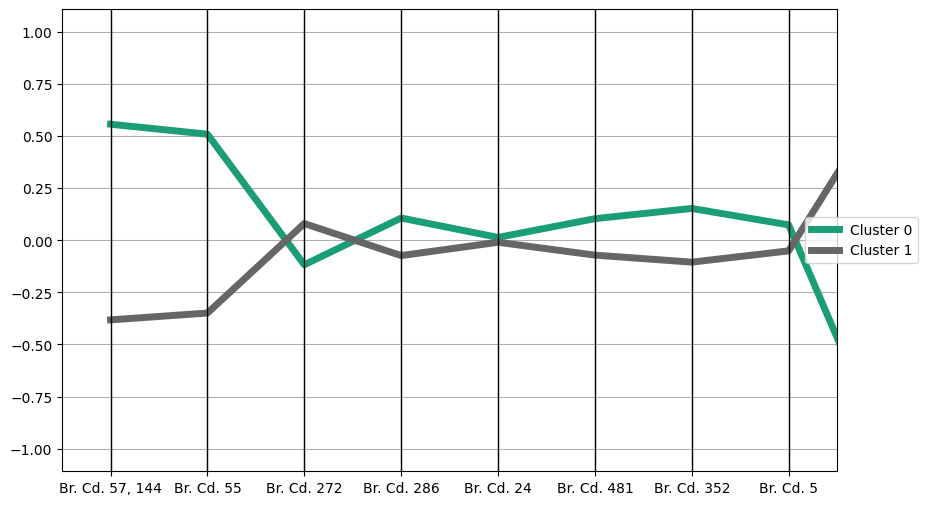

In [25]:

# Cluster Graph
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
plt.figure(figsize=(10,6))
#fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
centroids

#Evaluating clusters
bath1a_norm.groupby(kmeans.labels_).mean()

#Seperation between clusters
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)


In [ ]:

#==============================================================================
# Creating data fram that describing the basis for purchase. 
bath2b = bath_df[list(priceCategoryIndicator)+['Pur Vol No Promo - %', 
                                               'Pur Vol Promo 6 %', 'Pur Vol Other Promo %', 
                                               'PropCat 5', 'PropCat 14']]
# We need to scale the data fram, since it is not scaled. 
# Scaling the data
scaler = StandardScaler()
bath2b = scaler.fit_transform(bath2b)
bath3b = bath_df[list(purchaseIndicator)+list(otherBrandIndicator)+list(priceCategoryIndicator)+['maxBrandIndicator','Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %', 'PropCat 5', 'PropCat 14']]
scaler2 = StandardScaler()
bath3b = scaler2.fit_transform(bath3b)

# There is missing values, so I replace it with zeros to run the code "kmeans2_3"
dfbath2b = pd.DataFrame(bath2b).fillna(0)
dfbath3b = pd.DataFrame(bath3b).fillna(0)


#Running KMeans clustering for 2 and 3 clusters for basis for purchase variables
kmeans2_2 = KMeans(n_clusters=2, random_state=0).fit_transform(dfbath2b)
kmeans2_3 = KMeans(n_clusters=3, random_state=0).fit_transform(dfbath2b)


#Running KMeans clustering for 2 and 3 clusters for both purchase behavior and basis for purchase variables
kmeans3_2= KMeans(n_clusters=2, random_state=0).fit_transform(dfbath3b)
kmeans3_3 = KMeans(n_clusters=3, random_state=0).fit_transform(dfbath3b)

#==============================================================================




In [48]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the dependent variable (target variable)
y = df['Market Segment']

# Define the independent variables (predictors or features)
X = df[['Vol/Tran', 'Avg. Price ', 'Pur Vol Promo 6 %', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3',
         'Pr Cat 4', 'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9',
         'PropCat 10', 'PropCat 11', 'PropCat 12', 'PropCat 13', 'PropCat 14', 'PropCat 15']]

# Split the data into training and testing sets (use 70% for training and 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the independent variables (optional, but can improve performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the performance of the model on the training set
y_train_pred = model.predict(X_train_scaled)
print('Accuracy on training set:', accuracy_score(y_train, y_train_pred))
print('Precision on training set:', precision_score(y_train, y_train_pred))
print('Recall on training set:', recall_score(y_train, y_train_pred))
print('F1 score on training set:', f1_score(y_train, y_train_pred))

# Evaluate the performance of the model on the testing set
y_test_pred = model.predict(X_test_scaled)
print('Accuracy on testing set:', accuracy_score(y_test, y_test_pred))
print('Precision on testing set:', precision_score(y_test, y_test_pred))
print('Recall on testing set:', recall_score(y_test, y_test_pred))
print('F1 score on testing set:', f1_score(y_test, y_test_pred))


KeyError: 'Market Segment'